In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST dataset from sklearn
# Alternatively, we're already loading from CSV in the next cell, so this is just another option
try:
    # Load MNIST dataset from sklearn
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    X_mnist = mnist.data
    y_mnist = mnist.target
    print(f"MNIST dataset loaded from sklearn: {X_mnist.shape}")
except:
    print("Could not load MNIST from sklearn, will use the CSV file instead")

MNIST dataset loaded from sklearn: (70000, 784)


In [3]:
X_mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_mnist,y_mnist,test_size=0.2,random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [7]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

27.080880641937256


In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9700714285714286

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [12]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [13]:
X_train_trf.shape

(56000, 200)

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)
start_time = time.time()
y_pred = knn.predict(X_test_trf)
print(time.time() - start_time)

4.616844654083252


In [15]:
accuracy_score(y_test,y_pred) # Accuracy Decreases by 2% but prediction time decreases almost 6 times

0.9550714285714286

In [17]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [18]:
X_train_trf

array([[ -0.66184663,  -3.52844877],
       [ -2.4256249 ,  -3.51506096],
       [ -3.5671334 ,   4.78236184],
       ...,
       [ -8.34347904,  -1.19630488],
       [ 10.4937875 ,  -9.03606709],
       [ 10.57302752, -12.31764924]], shape=(56000, 2))

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [19]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [20]:
X_train_trf

array([[ -0.66184663,  -3.52844877,   3.59270247],
       [ -2.4256249 ,  -3.51506096,  -6.09394423],
       [ -3.5671334 ,   4.78236184,  -0.1521625 ],
       ...,
       [ -8.34347904,  -1.19630488,   2.03380685],
       [ 10.4937875 ,  -9.03606709,  -2.0532022 ],
       [ 10.57302752, -12.31764924,   3.06175533]], shape=(56000, 3))

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [21]:
pca.explained_variance_
# Eigen values

array([40.6329685 , 29.01311301, 26.91849535])

In [22]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [23]:
pca.explained_variance_ratio_

array([0.05674894, 0.04052038, 0.03759499])

In [24]:
pca = PCA(n_components=None) # None - n components
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [28]:
pca.explained_variance_.shape

(784,)

In [26]:
pca.components_.shape

(784, 784)

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05674894, 0.09726933, 0.13486432, 0.16394266, 0.18922822,
       0.2112008 , 0.23034992, 0.24791485, 0.26323209, 0.27717496,
       0.29064362, 0.30274463, 0.31395047, 0.32494179, 0.33525705,
       0.34523224, 0.35461032, 0.36383165, 0.37276159, 0.38140025,
       0.38962348, 0.39763208, 0.40530461, 0.41275343, 0.4199253 ,
       0.42684165, 0.43363123, 0.44023178, 0.44655255, 0.45267144,
       0.45868955, 0.46459041, 0.47026563, 0.4758571 , 0.48140571,
       0.4867798 , 0.4920408 , 0.49724346, 0.50237036, 0.50721194,
       0.51199592, 0.51667851, 0.5212608 , 0.52580576, 0.53028051,
       0.5346804 , 0.53906093, 0.54337629, 0.54763368, 0.55181705,
       0.55593261, 0.5599607 , 0.56395699, 0.56790803, 0.57180668,
       0.57555611, 0.57927153, 0.58297237, 0.58659865, 0.59018836,
       0.59372061, 0.59720922, 0.60065098, 0.60407883, 0.6074625 ,
       0.61078319, 0.61407195, 0.61730706, 0.62049057, 0.62365472,
       0.62677964, 0.62988218, 0.6329545 , 0.63598082, 0.63897

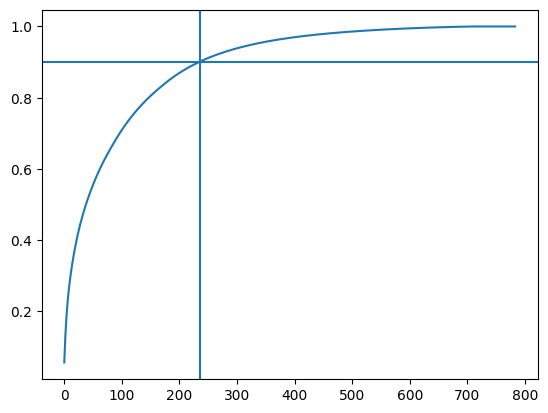

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.9)
plt.axvline(235) # The optimum number of principle components will be 235

<i>The variance captured by principle components should be 90% and above. That must principle components you have to take into account</i>

In [38]:
pca = PCA(n_components = 235)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [39]:
clf = KNeighborsClassifier()
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

accuracy_score(y_test, y_pred)

0.9525714285714286